# Attribute Informations 

* Sample code number: id number
* Clump Thickness: 1 - 10
* Uniformity of Cell Size: 1 - 10
* Uniformity of Cell Shape: 1 - 10
* Marginal Adhesion: 1 - 10
* Single Epithelial Cell Size: 1 - 10
* Bare Nuclei: 1 - 10
* Bland Chromatin: 1 - 10
* Normal Nucleoli: 1 - 10
* Mitoses: 1 - 10
* Class: (2 for benign, 4 for malignant)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("Breast Cancer Prediction.csv")
df = data.copy()
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


## Model Building

In [5]:
# split dataset

X = df.drop(["Sample code number","Class"], axis = 1)
y = df["Class"]

In [6]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 25)

In [7]:
model_names = [LogisticRegression,
         KNeighborsClassifier,
         MLPClassifier,
         DecisionTreeClassifier,
         RandomForestClassifier,
         GradientBoostingClassifier,
         LGBMClassifier]

In [8]:
# Test Performance with default parameters of Models

def first_test(models):
    for name in models:
        model_name = name().fit(X_train, y_train)
        results = name.__name__,"Test performance: " + str(accuracy_score(y_test, model_name.predict(X_test)))
        print(results)

In [9]:
# Results

first_test(model_names)

('LogisticRegression', 'Test performance: 0.9707602339181286')
('KNeighborsClassifier', 'Test performance: 0.9766081871345029')
('MLPClassifier', 'Test performance: 0.9766081871345029')
('DecisionTreeClassifier', 'Test performance: 0.9298245614035088')
('RandomForestClassifier', 'Test performance: 0.9532163742690059')
('GradientBoostingClassifier', 'Test performance: 0.9532163742690059')
('LGBMClassifier', 'Test performance: 0.9532163742690059')


## Hyperparameter optimization

In [10]:
# Optimization models with best parameters

def optimization(model_list):
    for name in model_list:
        if name.__name__ == "LogisticRegression":
            log_model = name()
            log_params = {"C" : range(1,10)}
            tuned_model = GridSearchCV(log_model, log_params, cv = 10).fit(X_train, y_train)
            global log_tuned_model
            log_tuned_model = name(C = tuned_model.best_params_.get("C")).fit(X_train, y_train)
            global log_result
            log_result =  name.__name__, accuracy_score(y_test, log_tuned_model.predict(X_test))

        elif name.__name__ == "KNeighborsClassifier":
            knn_model = name()
            knn_params = {"n_neighbors" : range(1,20)}
            tuned_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)
            global knn_tuned_model
            knn_tuned_model = name(n_neighbors = tuned_model.best_params_.get("n_neighbors")).fit(X_train,y_train)
            global knn_result
            knn_result = name.__name__, accuracy_score(y_test, knn_tuned_model.predict(X_test))
        elif name.__name__ == "MLPClassifier":
            mlp_model = name()
            mlp_params = {"alpha": [0.01, 0.02, 0.0001,0.00001],
                          "hidden_layer_sizes": [(10,10,10),(100,100,100),(100,100)],
                          "solver" : ["lbfgs","adam","sgd"],
                          "activation": ["relu","logistic"]}
            tuned_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs = -1).fit(X_train,y_train)
            best_params = tuned_model.best_params_
            global mlp_tuned_model
            mlp_tuned_model = name(alpha = best_params.get("alpha"),
                                  hidden_layer_sizes = best_params.get("hidden_layer_sizes"),
                                   solver = best_params.get("solver"),
                                   activation = best_params.get("activation")).fit(X_train,y_train)
            global mlp_result
            mlp_result = name.__name__, accuracy_score(y_test, mlp_tuned_model.predict(X_test))
        elif name.__name__ == "DecisionTreeClassifier":
            cart_model = name()
            cart_params = {"max_depth" : [10,20,50],
                          "min_samples_split" : range(2,10),
                          "min_samples_leaf" : range(1,10)}
            tuned_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1).fit(X_train,y_train)
            best_params = tuned_model.best_params_
            global cart_tuned_model
            cart_tuned_model = name(max_depth = best_params.get("max_depth"),
                                   min_samples_split = best_params.get("min_samples_split"),
                                   min_samples_leaf = best_params.get("min_samples_leaf")).fit(X_train, y_train)
            global cart_result
            cart_result = name.__name__, accuracy_score(y_test, cart_tuned_model.predict(X_test))
        elif name.__name__ == "RandomForestClassifier":
            rf_model = name()
            rf_params = {"n_estimators" : [50,100,200],
                          "max_depth" : [10,20,50],
                          "min_samples_split" : range(2,10),
                          "max_features" : [3,6,9]}
            tuned_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1).fit(X_train,y_train)
            best_params = tuned_model.best_params_
            global rf_tuned_model
            rf_tuned_model = name(max_depth = best_params.get("max_depth"),
                                   min_samples_split = best_params.get("min_samples_split"),
                                   n_estimators = best_params.get("n_estimators")).fit(X_train, y_train)
            global rf_result
            rf_result = name.__name__, accuracy_score(y_test, rf_tuned_model.predict(X_test))
        elif name.__name__ == "GradientBoostingClassifier":
            gbm_model = name()
            gbm_params = {"learning_rate" : [0.01, 0.1, 0.05],
                         "n_estimators": [50,100,200],
                         "max_depth": [3,5,10],
                         "min_samples_split": [2,5,10]}
            tuned_model = GridSearchCV(gbm_model, gbm_params, cv = 10).fit(X_train,y_train)
            best_params = tuned_model.best_params_
            global gbm_tuned_model
            gbm_tuned_model = name(max_depth = best_params.get("max_depth"),
                                   min_samples_split = best_params.get("min_samples_split"),
                                   n_estimators = best_params.get("n_estimators"),
                                   learning_rate = best_params.get("learning_rate")).fit(X_train, y_train)
            global gbm_result
            gbm_result = name.__name__, accuracy_score(y_test, gbm_tuned_model.predict(X_test))
        elif name.__name__ == "LGBMClassifier":
            lgbm_model = name()
            lgbm_params = {"n_estimators": [50, 100, 200],
                          "subsample": [0.6, 0.8, 1.0],
                          "max_depth": [3, 4,6],
                          "learning_rate": [0.1,0.01,0.02],
                          "min_child_samples": [2,5,10]}
            tuned_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10).fit(X_train,y_train)
            best_params = tuned_model.best_params_
            global lgbm_tuned_model
            lgbm_tuned_model = name(max_depth = best_params.get("max_depth"),
                                   min_child_samples = best_params.get("min_child_samples"),
                                   n_estimators = best_params.get("n_estimators"),
                                   learning_rate = best_params.get("learning_rate"),
                                   subsample = best_params.get("subsample")).fit(X_train, y_train)
            global lgbm_result
            lgbm_result = name.__name__, accuracy_score(y_test, lgbm_tuned_model.predict(X_test))
            
    return log_result, knn_result, mlp_result, cart_result, rf_result, gbm_result, lgbm_result

In [11]:
results = optimization(model_names)
results

(('LogisticRegression', 0.9649122807017544),
 ('KNeighborsClassifier', 0.9766081871345029),
 ('MLPClassifier', 0.9649122807017544),
 ('DecisionTreeClassifier', 0.9415204678362573),
 ('RandomForestClassifier', 0.9707602339181286),
 ('GradientBoostingClassifier', 0.9473684210526315),
 ('LGBMClassifier', 0.9473684210526315))

In [12]:
# convert results to pandas daraframe

tuned_df = pd.DataFrame(results, columns = ["model", "score"])
tuned_df

,model,score
0,LogisticRegression,0.964912
1,KNeighborsClassifier,0.976608
2,MLPClassifier,0.964912
3,DecisionTreeClassifier,0.941520
4,RandomForestClassifier,0.970760
5,GradientBoostingClassifier,0.947368
6,LGBMClassifier,0.947368


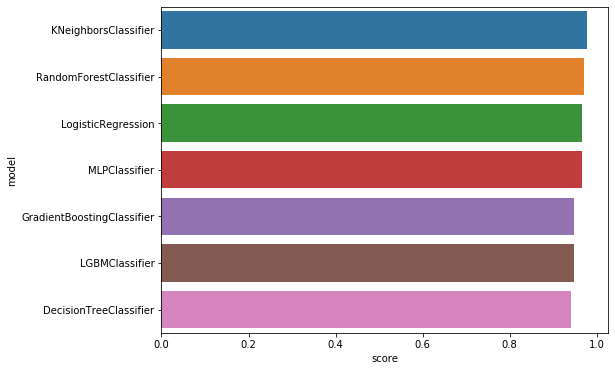

In [13]:
# visualization performances rank of models

plt.figure(figsize = (8,6))
sns.barplot(x = "score", y = "model", data = tuned_df.sort_values(by = "score", ascending = False));

In [14]:
# View Model and Best Parameters
print(knn_tuned_model.__class__.__name__)
print("\n")
print(knn_tuned_model.get_params())

KNeighborsClassifier


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [15]:
# model accuracy score on train and test dataset

print("Train set accuracy: %.3f" % accuracy_score(y_train, knn_tuned_model.predict(X_train)))
print("Test set accuracy: %.3f" % accuracy_score(y_test,knn_tuned_model.predict(X_test)))

Train set accuracy: 0.984
Test set accuracy: 0.977


In [16]:
# confusion matrix on train dataset

confusion_matrix(y_train, knn_tuned_model.predict(X_train))

array([[319,   4],
       [  4, 185]], dtype=int64)

In [17]:
# confusion matrix on test dataset

confusion_matrix(y_test, knn_tuned_model.predict(X_test))

array([[117,   4],
       [  0,  50]], dtype=int64)

In [18]:
# classification report

print(classification_report(y_test, knn_tuned_model.predict(X_test)))

              precision    recall  f1-score   support

           2       1.00      0.97      0.98       121
           4       0.93      1.00      0.96        50

    accuracy                           0.98       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



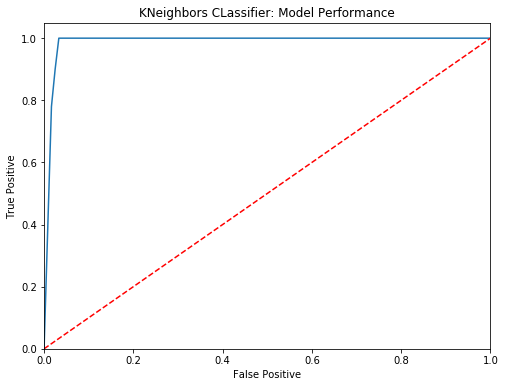

In [19]:
# Roc Auc score

knn_roc_auc = roc_auc_score(y_test, knn_tuned_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knn_tuned_model.predict_proba(X_test)[:,1], pos_label=4)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('KNeighbors CLassifier: Model Performance')
plt.show()